# Super-Market Sales Exploratory Data Analysis

In [1]:
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Set

In [2]:
data = pd.read_csv('supermarket_sales.csv',encoding='unicode-escape')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


# Understanding The Data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
data.shape

(1000, 17)

In [6]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
data.describe().astype(int)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000,1000
mean,55,5,15,322,307,4,15,6
std,26,2,11,245,234,0,11,1
min,10,1,0,10,10,4,0,4
25%,32,3,5,124,118,4,5,5
50%,55,5,12,253,241,4,12,7
75%,77,8,22,471,448,4,22,8
max,99,10,49,1042,993,4,49,10


In [8]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [9]:
[x.upper() for x in data.columns]

['INVOICE ID',
 'BRANCH',
 'CITY',
 'CUSTOMER TYPE',
 'GENDER',
 'PRODUCT LINE',
 'UNIT PRICE',
 'QUANTITY',
 'TAX 5%',
 'TOTAL',
 'DATE',
 'TIME',
 'PAYMENT',
 'COGS',
 'GROSS MARGIN PERCENTAGE',
 'GROSS INCOME',
 'RATING']

In [10]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
(data[data.Rating.isna()].shape[0]/data.shape[0])*100

0.0

# Data Cleaning and Manipulation

In [12]:
data.rename(columns = {'cogs':'Cost_of_Goods_Sold', 'Tax 5%':'Tax(5%)'}, inplace = True)

In [13]:
data.rename(columns = {'Customer type':'Customer_type', 'Product line':'Product_line', 'Unit price':'Unit_price','Invoice ID':'Invoice_ID'}, inplace = True)

In [14]:
data.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax(5%)', 'Total', 'Date',
       'Time', 'Payment', 'Cost_of_Goods_Sold', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

In [15]:
data.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [16]:
data.Branch

0      A
1      C
2      A
3      A
4      A
      ..
995    C
996    B
997    A
998    A
999    A
Name: Branch, Length: 1000, dtype: object

In [17]:
len(data.Invoice_ID.unique())

1000

In [18]:
data.Product_line.unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [19]:
data.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax(5%),Total,Date,Time,Payment,Cost_of_Goods_Sold,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [20]:
data.tail(3)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax(5%),Total,Date,Time,Payment,Cost_of_Goods_Sold,gross margin percentage,gross income,Rating
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.592,33.432,2/9/2019,13:22,Cash,31.84,4.761905,1.592,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.291,69.111,2/22/2019,15:33,Cash,65.82,4.761905,3.291,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.919,649.299,2/18/2019,13:28,Cash,618.38,4.761905,30.919,6.6


In [21]:
# I did a code that added SalesVales which we dont need and also gross margin percentage, gross income arent important in the data
Clean_data = data.drop(['gross margin percentage','gross income'], axis=1)

# Relationships and Insights

In [22]:
Clean_data.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax(5%),Total,Date,Time,Payment,Cost_of_Goods_Sold,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,5.3


Text(0.5, 1.0, 'HEATMAP SHOWING CORRELATOIN BETWEEN COLUMNS')

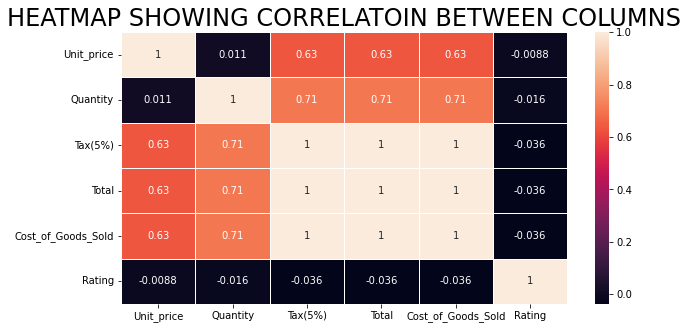

In [23]:
plt.figure(figsize=(10, 5))
sns.heatmap(Clean_data.corr(), annot=True, linewidths=.5)
plt.title("HEATMAP SHOWING CORRELATOIN BETWEEN COLUMNS",fontsize=24)

In [24]:
#average price per sale
Clean_data.groupby('Invoice_ID').Total.mean().astype(int)[:10].sort_values(ascending=False)[:10]

Invoice_ID
109-28-2512    614
105-31-1824    510
102-77-2261    480
109-86-4363    441
101-17-6199    336
110-05-6330    248
102-06-2002    132
101-81-4070    131
106-35-6779     93
105-10-6182     45
Name: Total, dtype: int32

In [25]:
Clean_data.groupby('Branch').Cost_of_Goods_Sold.sum().astype(int).sort_values(ascending=False)

Branch
C    105303
A    101143
B    101140
Name: Cost_of_Goods_Sold, dtype: int32

In [26]:
Clean_data.groupby('City').Cost_of_Goods_Sold.sum().astype(int).sort_values(ascending=False)

City
Naypyitaw    105303
Yangon       101143
Mandalay     101140
Name: Cost_of_Goods_Sold, dtype: int32

In [27]:
Clean_data.groupby('Customer_type').Cost_of_Goods_Sold.sum().astype(int).sort_values(ascending=False)

Customer_type
Member    156403
Normal    151184
Name: Cost_of_Goods_Sold, dtype: int32

In [28]:
Clean_data.groupby('Gender').Cost_of_Goods_Sold.sum().astype(int).sort_values(ascending=False)

Gender
Female    159888
Male      147698
Name: Cost_of_Goods_Sold, dtype: int32

In [29]:
Clean_data.groupby('Product_line').Cost_of_Goods_Sold.sum().astype(int).sort_values(ascending=False)

Product_line
Food and beverages        53471
Sports and travel         52497
Electronic accessories    51750
Fashion accessories       51719
Home and lifestyle        51297
Health and beauty         46851
Name: Cost_of_Goods_Sold, dtype: int32

In [30]:
Clean_data.groupby('Gender').Cost_of_Goods_Sold.sum().astype(int).sort_values(ascending=False)

Gender
Female    159888
Male      147698
Name: Cost_of_Goods_Sold, dtype: int32

In [31]:
Clean_data.groupby('Payment').Cost_of_Goods_Sold.sum().astype(int).sort_values(ascending=False)

Payment
Cash           106863
Ewallet        104755
Credit card     95968
Name: Cost_of_Goods_Sold, dtype: int32

In [32]:
Clean_data.groupby('Payment').Cost_of_Goods_Sold.count().astype(int).sort_values(ascending=False)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: Cost_of_Goods_Sold, dtype: int32

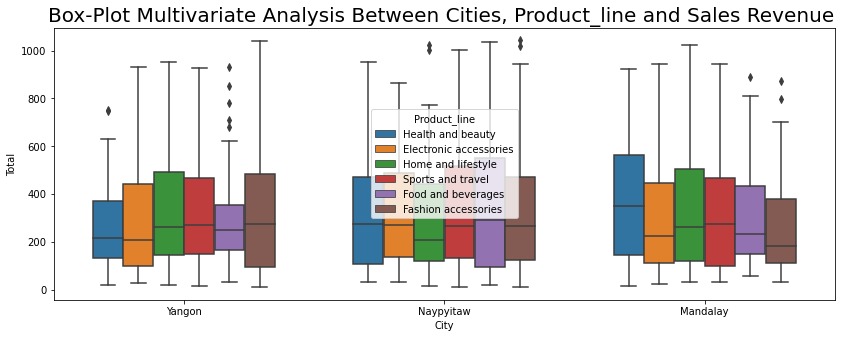

In [33]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=Clean_data,
            x="City",
            y="Total",
            hue="Product_line",
            dodge=True,   
            width=0.7,   
            whis=1.5, )

plt.title("Box-Plot Multivariate Analysis Between Cities, Product_line and Sales Revenue ",fontsize=20)
plt.show()

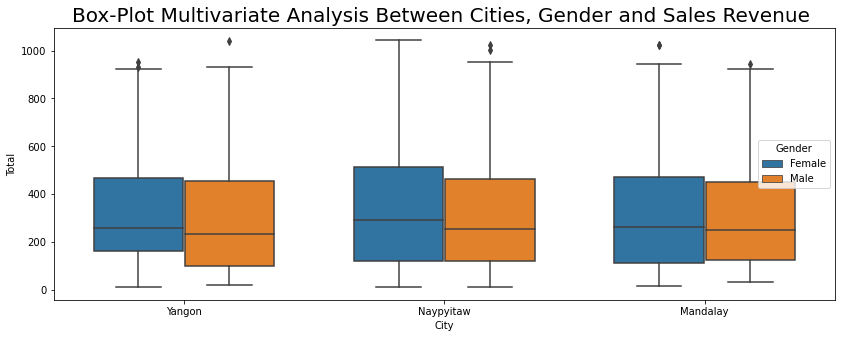

In [34]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=Clean_data,
            x="City",
            y="Total",
            hue="Gender",
            dodge=True,   
            width=0.7,   
            whis=1.5, )

plt.title("Box-Plot Multivariate Analysis Between Cities, Gender and Sales Revenue ",fontsize=20)
plt.show()

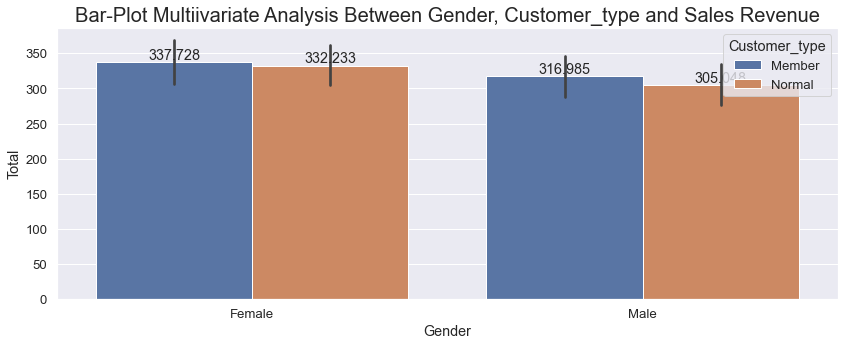

In [35]:
sns.set_theme(font_scale=1.2) # set theme for plots

plt.figure(figsize=(14, 5))
ab=sns.barplot(data=Clean_data,
                x="Gender",
                y="Total",
                hue='Customer_type'
                #hue='Payment'
             
               )
for i in ab.containers:
    ab.bar_label(i,)

plt.title("Bar-Plot Multiivariate Analysis Between Gender, Customer_type and Sales Revenue",fontsize=20)
plt.show()

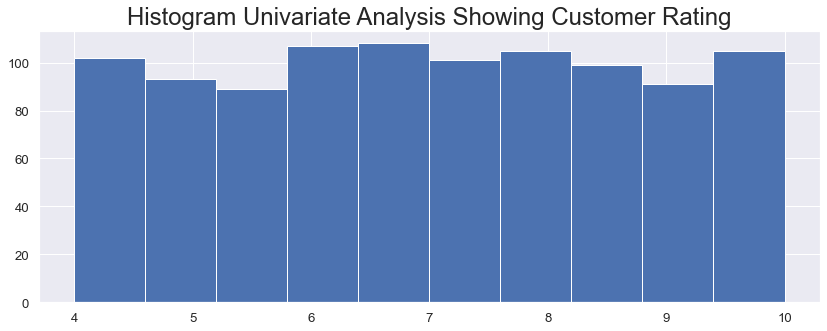

In [36]:
plt.figure(figsize=(14, 5))
ab=plt.hist(Clean_data.Rating)
plt.title("Histogram Univariate Analysis Showing Customer Rating",fontsize=24)
plt.show()

In [37]:
top_sales = Clean_data.groupby('Branch').Total.sum().sort_values(ascending=False)[:10]

In [38]:
top_sales

Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64

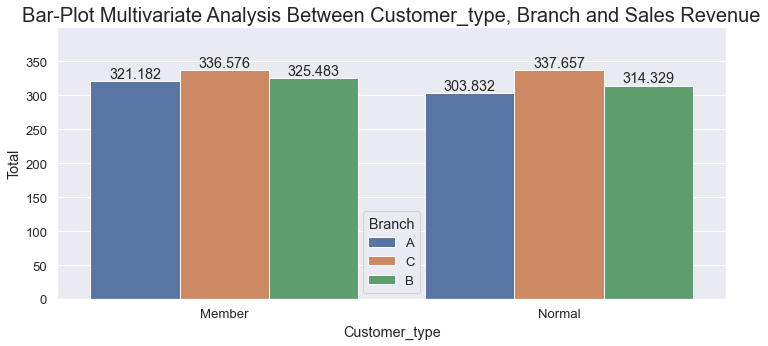

In [39]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Customer_type',
                 y='Total',
                 hue='Branch',
                 data=Clean_data,
                 errwidth=0)
plt.title("Bar-Plot Multivariate Analysis Between Customer_type, Branch and Sales Revenue",fontsize=20)
for i in ax.containers:
    ax.bar_label(i,)

In [40]:
Clean_data['Date'] = pd.to_datetime(Clean_data.Date)

In [41]:
pd.to_datetime(Clean_data.Date).dt.day

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: int64

In [42]:
Clean_data.dtypes

Invoice_ID                    object
Branch                        object
City                          object
Customer_type                 object
Gender                        object
Product_line                  object
Unit_price                   float64
Quantity                       int64
Tax(5%)                      float64
Total                        float64
Date                  datetime64[ns]
Time                          object
Payment                       object
Cost_of_Goods_Sold           float64
Rating                       float64
dtype: object

(0.0, 8000.0)

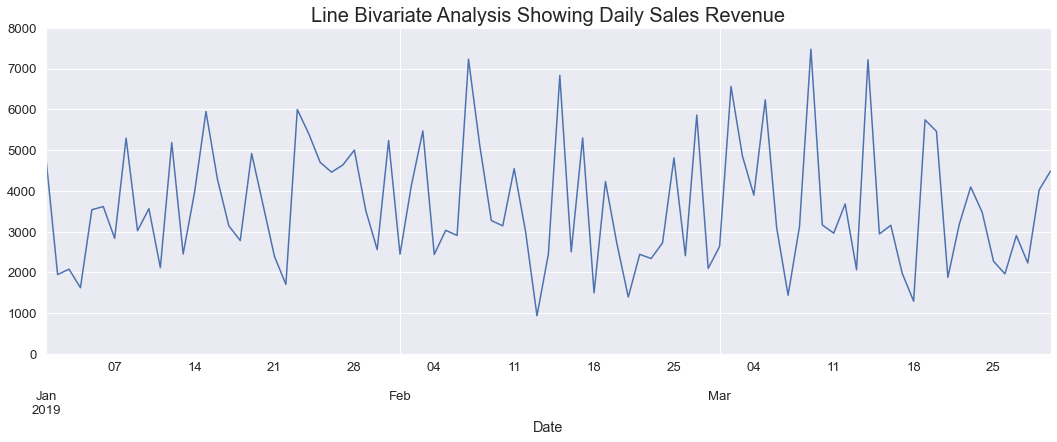

In [43]:
plt.figure(figsize=(18,6))
Clean_data.groupby('Date').Total.sum().plot()
plt.title("Line Bivariate Analysis Showing Daily Sales Revenue",fontsize=20)
plt.ylim(0,8000)

In [44]:
Clean_data.groupby('Date').Cost_of_Goods_Sold.sum().sort_values(ascending=False)[:10]

Date
2019-03-09    7118.14
2019-02-07    6884.01
2019-03-14    6871.08
2019-02-15    6505.51
2019-03-02    6247.91
2019-03-05    5934.17
2019-01-23    5708.75
2019-01-15    5661.20
2019-02-27    5580.43
2019-03-19    5467.04
Name: Cost_of_Goods_Sold, dtype: float64

In [45]:
print('Earliest date: ',Clean_data.Date.min())
print('Latest date: ',Clean_data.Date.max())

Earliest date:  2019-01-01 00:00:00
Latest date:  2019-03-30 00:00:00


In [46]:
print('Lowest Unit Price: ',Clean_data.Unit_price.min())
print('Highest Unit Price: ',Clean_data.Unit_price.max())
print('Mean of Unit Price: ',Clean_data.Unit_price.mean())

Lowest Unit Price:  10.08
Highest Unit Price:  99.96
Mean of Unit Price:  55.67212999999998


In [47]:
print('Lowest Total: ',Clean_data.Total.min())
print('Highest Total: ',Clean_data.Total.max())
print('Mean of Total: ',Clean_data.Total.mean())

Lowest Total:  10.6785
Highest Total:  1042.65
Mean of Total:  322.96674900000005


In [48]:
print('Lowest Quantity: ',Clean_data.Quantity.min())
print('Highest Quantity: ',Clean_data.Quantity.max())
print('Mean of Quantity: ',Clean_data.Quantity.mean())

Lowest Quantity:  1
Highest Quantity:  10
Mean of Quantity:  5.51


In [49]:
print('Lowest Tax: ',Clean_data['Tax(5%)'].min())
print('Highest Tax: ',Clean_data['Tax(5%)'].max())
print('Mean of Tax: ',Clean_data['Tax(5%)'].mean())

Lowest Tax:  0.5085
Highest Tax:  49.65
Mean of Tax:  15.379369000000002


In [50]:
Clean_data.groupby('Date').Cost_of_Goods_Sold.sum().sort_values(ascending=False)[-10:]

Date
2019-03-26    1869.06
2019-01-02    1852.86
2019-03-21    1788.11
2019-01-22    1623.59
2019-01-04    1546.37
2019-02-18    1424.79
2019-03-07    1369.77
2019-02-21    1327.37
2019-03-18    1231.27
2019-02-13     889.75
Name: Cost_of_Goods_Sold, dtype: float64

In [51]:
Clean_data.groupby('City').Product_line.count().sort_values(ascending=False)

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: Product_line, dtype: int64

In [52]:
Clean_data['weekday'] = Clean_data['Date'].dt.day_name() 

In [53]:
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Invoice_ID          1000 non-null   object        
 1   Branch              1000 non-null   object        
 2   City                1000 non-null   object        
 3   Customer_type       1000 non-null   object        
 4   Gender              1000 non-null   object        
 5   Product_line        1000 non-null   object        
 6   Unit_price          1000 non-null   float64       
 7   Quantity            1000 non-null   int64         
 8   Tax(5%)             1000 non-null   float64       
 9   Total               1000 non-null   float64       
 10  Date                1000 non-null   datetime64[ns]
 11  Time                1000 non-null   object        
 12  Payment             1000 non-null   object        
 13  Cost_of_Goods_Sold  1000 non-null   float64      

In [54]:
Clean_data.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax(5%),Total,Date,Time,Payment,Cost_of_Goods_Sold,Rating,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,5.3,Friday


In [55]:
DF=(Clean_data.groupby('weekday').Total.sum().sort_values(ascending=False))
DF

weekday
Saturday     56120.8095
Tuesday      51482.2455
Thursday     45349.2480
Sunday       44457.8925
Friday       43926.3405
Wednesday    43731.1350
Monday       37899.0780
Name: Total, dtype: float64

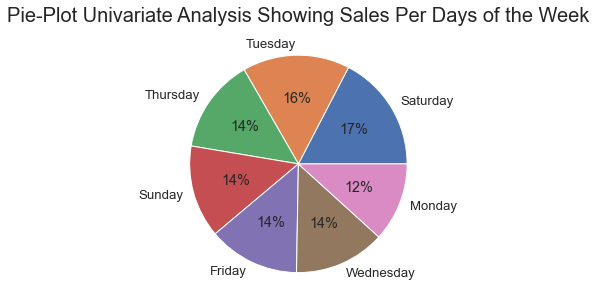

In [56]:
sns.set_theme(font_scale=1.2) # set theme for plots

plt.figure(figsize=(7, 5))
plt.pie(DF,labels=DF.index,autopct='%.0f%%')
plt.title('Pie-Plot Univariate Analysis Showing Sales Per Days of the Week',fontsize=20)
                
plt.show()

(0.0, 3000.0)

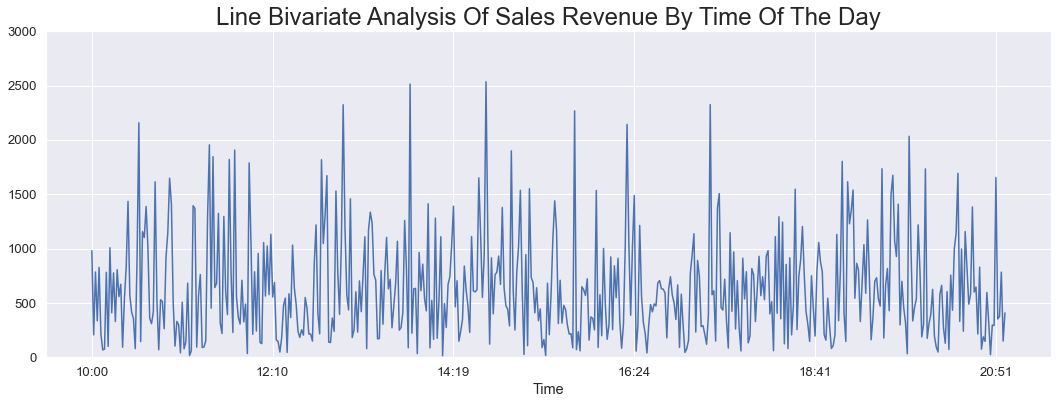

In [58]:
plt.figure(figsize=(18,6))
Clean_data.groupby('Time').Total.sum().plot()
plt.title('Line Bivariate Analysis Of Sales Revenue By Time Of The Day',fontsize=24)

plt.ylim(0,3000)